In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Kratek potek

## Uvoz modula in kreacija objekta

Podatki moje grupe so:
	
* P<sub>1</sub> = 7500 W
* n<sub>1</sub> = 1455 min<sup>-1</sup>
* n<sub>3</sub> = 100 min<sup>-1</sup>
* m<sub>1,2</sub> = 2,5	mm
* m<sub>3,4</sub> = 4,5 mm

Uvozimo "Gonilo" in ustvarimo objekt "Klemen" z našimi podatki:

In [2]:
from gonilo import Gonilo
Klemen = Gonilo(5500, 1455, 120, 2, 3, z1=21, z3=21)

Vse funkcionalnosti lahko pogledamo z: (večina docstringov)

In [3]:
help(Klemen)

Help on Gonilo in module gonilo object:

class Gonilo(builtins.object)
 |  Class za preračune vseh potrebnih parametrov za poročilo pri predmetu Strojni elementi 2.
 |  Zahtevani vhodni podatki so (Vhodna moč P1[W], vrtilna hitrost prve gredi n1[min^-1], vrtilna hitrost tretje gredi n3[min^-1], modul prvega in 
 |  drugega zobnika m12[mm], modul tretjega in četrtega zobnika m34[mm], število zob prvega zobnika z1[/] in tretjega zobnika z3[/] ter kota 
 |  poševnosti beta1[°] in beta2[°].)
 |  
 |  Methods defined here:
 |  
 |  LV_TsklR(self, Tok=22.8, Tkon=28.2)
 |      "Metoda vrne realno razliko temperatur na splopki (pred in po zagonu).
 |  
 |  LV_TsklT(self, mpl=8.3, cp=460)
 |      "Metoda sprejme maso plošče [kg] in cp materiala [J/kgK] ter vrne teoretično razliko temperatur na sploki (pred in po zagonu).
 |  
 |  LV_graf1(self)
 |      "Metoda izriše graf odvisnosti vrtilnih hitrosti od časa za elektromotor in sklopko.
 |  
 |  LV_graf2(self)
 |      "Metoda izriše graf odvisno

Že takoj lahko kličemo nekaj atributov našega objekta:

In [4]:
print('Skupno prestavno razmerje =',Klemen.isk)
print('Moč na delovnem stroju = ',Klemen.Pds)

Skupno prestavno razmerje = 12.125
Moč na delovnem stroju =  4822.772700288396


## Sosledje klicanja funkcij

V nadaljevanju je predstavljeno logično sosledje, v katerem moramo klicati metode, da objektu ustrezno določimo vse lastnosi in na koncu napišemo poročilo.

### Statika gredi 
(izrišejo se grafi prečnih sil in momentov v X-Y in X-Z ravnini).

l1 - razdalja od ležaja v podpori A do zobnika

l2 - razdalja od enega do drugega zobnika

l3 - razdalja od drugega zobnika do ležaja v podpori B

Pri prvi gredi je pomemben le seštevek l2 + l3, kar predstavlja razdaljo od zobnika do ležaja v podpori B (prav tako pri tretji gredi velja za l1 + l2).

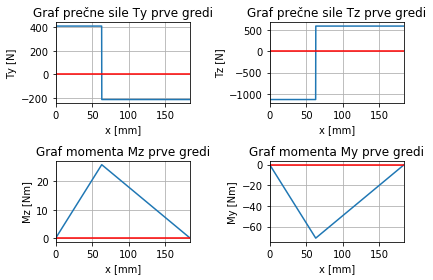

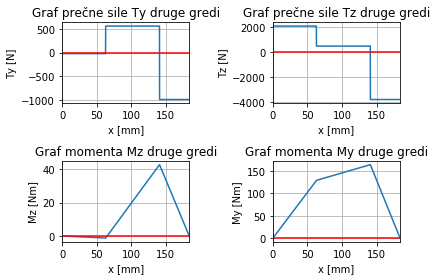

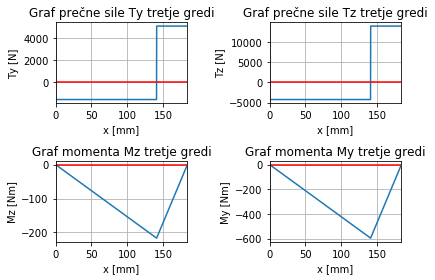

In [5]:
Klemen.statika_gredi_1(l1 = 63, l2 = 78, l3 = 43)
Klemen.statika_gredi_2(l1 = 63, l2 = 78, l3 = 43)
Klemen.statika_gredi_3(l1 = 63, l2 = 78, l3 = 43)

### Statika ležajev
Izpiše, če statična varnost večja od dovoljene.

In [6]:
Klemen.lezaji_staticna(gred = 1, fiksen = 'A' , C0={'A':8300, 'B':8300})
Klemen.lezaji_staticna(gred = 2, fiksen = 'A' , C0={'A':14600, 'B':16000})
Klemen.lezaji_staticna(gred = 3, fiksen = 'A' , C0={'A':23200, 'B':23200})

Statična varnost S0 je večja od dovoljene, zato ležaj v podpori A zdrži statično obremenitev.
Statična varnost S0 je večja od dovoljene, zato ležaj v podpori B zdrži statično obremenitev.
Statična varnost S0 je večja od dovoljene, zato ležaj v podpori A zdrži statično obremenitev.
Statična varnost S0 je večja od dovoljene, zato ležaj v podpori B zdrži statično obremenitev.
Statična varnost S0 je večja od dovoljene, zato ležaj v podpori A zdrži statično obremenitev.
Statična varnost S0 je večja od dovoljene, zato ležaj v podpori B zdrži statično obremenitev.


In [7]:
Klemen.lezaji_doba_trajana(gred = 1, fiksen='A', C = {'A':13800, 'B':13800})
Klemen.lezaji_doba_trajana(gred = 2, fiksen='A', C = {'A':22100, 'B':22900})
Klemen.lezaji_doba_trajana(gred = 3, fiksen='A', C = {'A':30700, 'B':30700})

Klemen.lezaji_razsirjena_doba_trajana(gred = 1, T_obr = 80, Cu = {'A':355, 'B':355}, d_lez = {'A':30, 'B':30}, D_lez = {'A':55, 'B':55}, olje = 100)
Klemen.lezaji_razsirjena_doba_trajana(gred = 2, T_obr = 80, Cu = {'A':640, 'B':710}, d_lez = {'A':45, 'B':50}, D_lez = {'A':75, 'B':80}, olje = 1500)
Klemen.lezaji_razsirjena_doba_trajana(gred = 3, T_obr = 80, Cu = {'A':980, 'B':980}, d_lez = {'A':60, 'B':60}, D_lez = {'A':95, 'B':95}, olje = 1500)

### Vrednotenje gredi pod zobniki

In [8]:
Klemen.kriticni_prerezi(gred=1, d_pod_zobnikom=35,Rp02=215, Rm=500, Rmax=4, tab1_st=5, material='S235')
Klemen.kriticni_prerezi(gred=2, d_pod_zobnikom=50,Rp02=215, Rm=500, Rmax=4, tab1_st=5, material='S235', Mf =[137.75, 177.443])
Klemen.kriticni_prerezi(gred=3, d_pod_zobnikom=65,Rp02=215, Rm=500, Rmax=4, tab1_st=5, material='S235')

### Korenska in bočna nosilnost zobnikov

In [9]:
Klemen.korenska_nosilnost(zveza=12, Yfa=1, Ysa=1, Kfa=1, Kv=1, sigmaflim=250, YRrelT=1, Yx=1)
Klemen.korenska_nosilnost(zveza=34, Yfa=1, Ysa=1, Kfa=1, Kv=1, sigmaflim=250, YRrelT=1, Yx=1)

Klemen.bocna_nosilnost(zveza=12, Zeps=0.75, Kv = 1, sigmahlim = 600, ZX=1)
Klemen.bocna_nosilnost(zveza=34, Zeps=0.75, Kv = 1, sigmahlim = 600, ZX=1)

### Laboratorijska vaja
Popolnoma ločena od ostalega dela, se ne navezuje na prej izračunane vrednosti.

In [10]:
Klemen.LV_preberi_meritve('podatki_laboratorijska\S01meh.txt') #podamo pot do podatkov
Klemen.LV_TsklR(Tok = 22.8, Tkon = 28.2)

5.399999999999999

In [11]:
Klemen.LV_TsklT(mpl=8.3, cp=460)

16.581001833047427

In [12]:
# vrne seznam, pri čemer prva vrednost predstavlja št. zagonov ob upoštevanju realne razlike temperatur, drugi pa št. zagonov ob upoštevanju teoretične razlike temperatur.
Klemen.LV_nzagonov(Tdop = 373)

[64.85185185185186, 21.120557341838047]

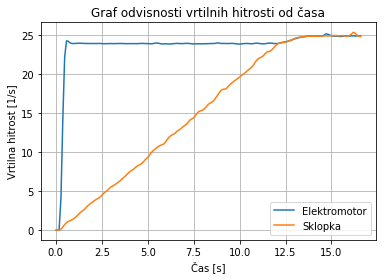

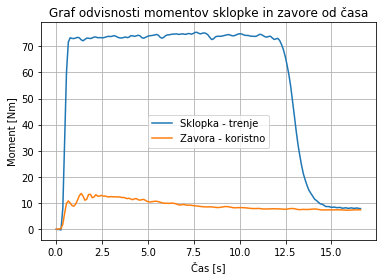

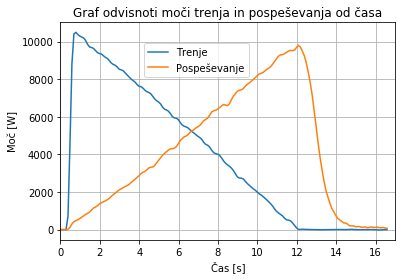

In [13]:
# Lahko izrišemo vse 3 grafe
Klemen.LV_graf1()
plt.show()
Klemen.LV_graf2()
plt.show()
Klemen.LV_graf3()
plt.show()

### Zapis končnih poročil

In [14]:
Klemen.zapisi_txt('Porocilo123.txt') # zapiše tekstovno datoteko
Klemen.zapisi_eksel('Slovarji.xlsx') # zapiše excel tabele

### Extra

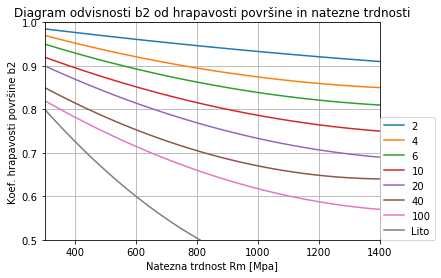

In [15]:
Klemen.diagram_8_izris()

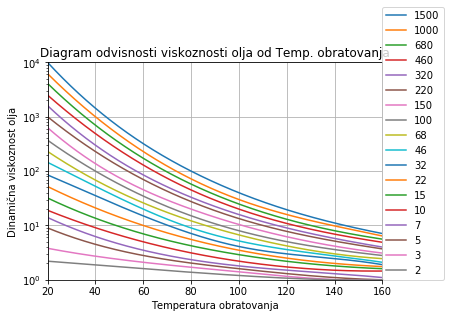

In [16]:
Klemen.diagram_10_izris()